**Group-08**<br/>
<font style="color:red"> **Belhassen Ghoul <br/> Robin Ehrensperger <br/> Dominic Diedenhofen**</font>

<font style="color:green"><h1>Exercise 2 - Shallow networks on CIFAR10</h1></font>

<font style="color:green"><h2>One-layer network and weight visualisation</h2></font>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.regularizers import l2

In [2]:
#load and split data
(xTrain,yTrain),(xTest,yTest) = cifar10.load_data()
xTrain.shape

(50000, 32, 32, 3)

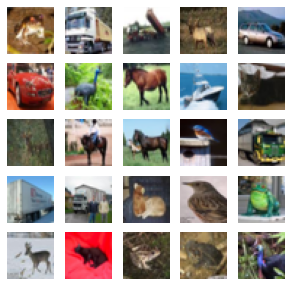

In [3]:
fig, axs = plt.subplots(5,5,figsize=(5,5))
cnt = 0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(xTrain[cnt])
        axs[i,j].axis("off")
        cnt+=1
plt.show()

In [4]:
xTrain = xTrain.reshape(50000,32*32*3).astype("float32")/255
xTest = xTest.reshape(10000,32*32*3).astype("float32")/255

nClasses = 10
yTrain =to_categorical(yTrain,nClasses)
yTest = to_categorical(yTest,num_classes=nClasses)
print(yTrain[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [5]:
nepochs = 5
batchSize = 128
inputShape = 32*32*3

model = Sequential()
model.add(Dense(kernel_regularizer=l2(0.05),units=nClasses,input_shape=(inputShape,),activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=nepochs,validation_data=(xTest,yTest))

Epoch 1/5
391/391 [==============================] - 2s 2ms/step - loss: 2.3147 - accuracy: 0.3015 - val_loss: 1.9789 - val_accuracy: 0.3584
Epoch 2/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9900 - accuracy: 0.3334 - val_loss: 2.0031 - val_accuracy: 0.3038
Epoch 3/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9860 - accuracy: 0.3293 - val_loss: 1.9884 - val_accuracy: 0.3209
Epoch 4/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9881 - accuracy: 0.3296 - val_loss: 1.9762 - val_accuracy: 0.3363
Epoch 5/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9849 - accuracy: 0.3331 - val_loss: 1.9670 - val_accuracy: 0.3458


In [7]:
lossTest, metricTest = model.evaluate(xTest,yTest, verbose=0)
lossTest,metricTest

(1.96700918674469, 0.3458000123500824)

(3072, 10)
(10,)


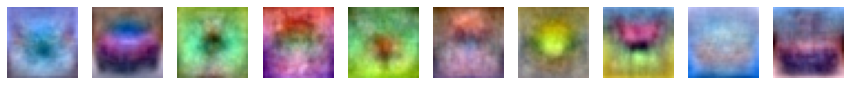

In [8]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
fig = plt.figure(figsize=(15,15))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    img = w1[:,i]
    img = img.reshape(32,32,3)
    min = np.min(img)
    max = np.max(img)
    img = np.round((img-min)/(max-min)*255).astype(int)
    ax.axis("off")
    ax.imshow(img)

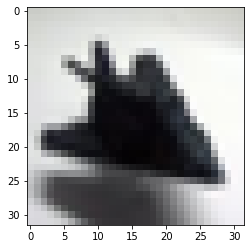

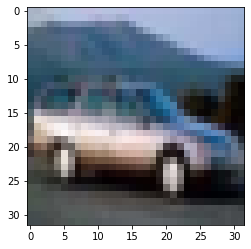

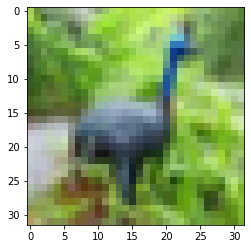

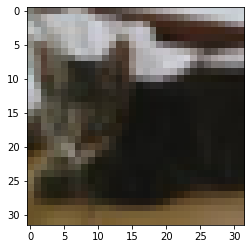

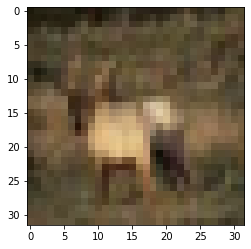

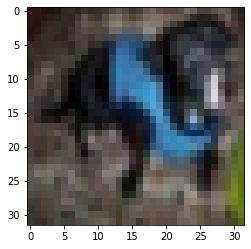

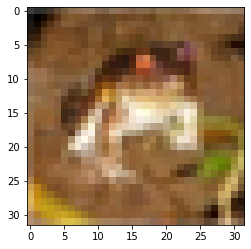

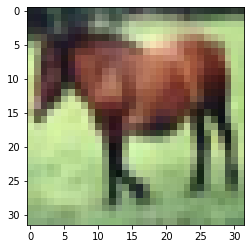

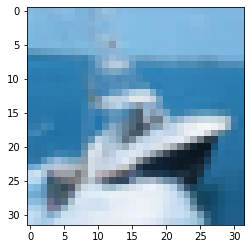

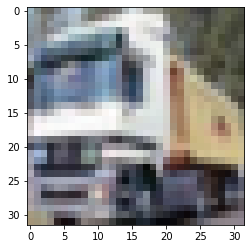

In [9]:
for j in np.arange(0,10):
    for i in range(len(yTrain)):
        if yTrain[i,j]==1:
            test_im1 = xTrain[i]
            plt.imshow(test_im1.reshape(32,32,3),interpolation='none')
            plt.show()
            break



<font style="color:green"><h2>Two-layers network</h2></font>


In [10]:
nepochs = 50
batchSize = 128
inputShape = 32*32*3

model = Sequential()
model.add(keras.layers.Input(shape=inputShape))
model.add(Dense(units=512, activation= "relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               1573376   
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,643,498
Trainable params: 1,643,498
Non-trainable params: 0
_________________________________________________________________


<font style="color:red"><h2>52.1%</h2></font>

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=nepochs,validation_data=(xTest,yTest))

Epoch 1/50
391/391 [==============================] - 1s 3ms/step - loss: 1.9895 - accuracy: 0.2659 - val_loss: 1.8645 - val_accuracy: 0.3288
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 1.7583 - accuracy: 0.3653 - val_loss: 1.7182 - val_accuracy: 0.3791
Epoch 3/50
391/391 [==============================] - 1s 2ms/step - loss: 1.6575 - accuracy: 0.4047 - val_loss: 1.6459 - val_accuracy: 0.4042
Epoch 4/50
391/391 [==============================] - 1s 2ms/step - loss: 1.5939 - accuracy: 0.4269 - val_loss: 1.5638 - val_accuracy: 0.4384
Epoch 5/50
391/391 [==============================] - 1s 2ms/step - loss: 1.5474 - accuracy: 0.4448 - val_loss: 1.5767 - val_accuracy: 0.4354
Epoch 6/50
391/391 [==============================] - 1s 2ms/step - loss: 1.5101 - accuracy: 0.4597 - val_loss: 1.5224 - val_accuracy: 0.4553
Epoch 7/50
391/391 [==============================] - 1s 2ms/step - loss: 1.4800 - accuracy: 0.4699 - val_loss: 1.4918 - val_accuracy: 0.4655
Epoch 

In [12]:
lossTest, metricTest = model.evaluate(xTest,yTest, verbose=0)
lossTest,metricTest

(1.568941354751587, 0.5109000205993652)